In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [2]:
file_path = 'BoiGordo.csv'

In [3]:
try:
    df = pd.read_csv(file_path, encoding='utf-8', index_col='Date')
    df['LAST'] = pd.to_numeric(df['LAST'].str.replace(',', '.'), errors='coerce')
    df['OPEN'] = pd.to_numeric(df['OPEN'].str.replace(',', '.'), errors='coerce')
    df['HIGH'] = pd.to_numeric(df['HIGH'].str.replace(',', '.'), errors='coerce')
    df['LOW'] = pd.to_numeric(df['LOW'].str.replace(',', '.'), errors='coerce')

    df['returns'] = ((df['LAST'].shift(1) - df['LAST']) / df['LAST'].shift(1)) * 100
    df['returns'] = (df['returns'].shift(-1)).round(2)
    
    print(df.dropna())
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

              LAST    OPEN    HIGH     LOW     Vol     Var  returns
Date                                                               
31.07.2023  178.05  178.35  178.65  176.80  10,75K  -0,06%    -0.06
28.07.2023  178.15  178.45  179.07  178.00   9,26K   0,06%     0.06
27.07.2023  178.05  178.78  178.93  177.95   6,60K  -0,35%    -0.35
26.07.2023  178.68  178.25  178.97  177.88   5,87K   0,21%     0.21
25.07.2023  178.30  179.45  179.60  177.90   8,34K  -0,25%    -0.25
...            ...     ...     ...     ...     ...     ...      ...
09.08.2010   93.10   92.97   93.30   92.60   9,24K   0,34%     0.34
06.08.2010   92.78   92.95   93.00   92.50  11,64K  -0,13%    -0.13
05.08.2010   92.90   93.20   93.80   92.85  10,65K  -0,27%    -0.27
04.08.2010   93.15   91.90   93.40   91.88  11,09K   1,38%     1.36
03.08.2010   91.88   92.15   92.42   91.50   6,00K  -0,31%    -0.32

[3260 rows x 7 columns]


In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

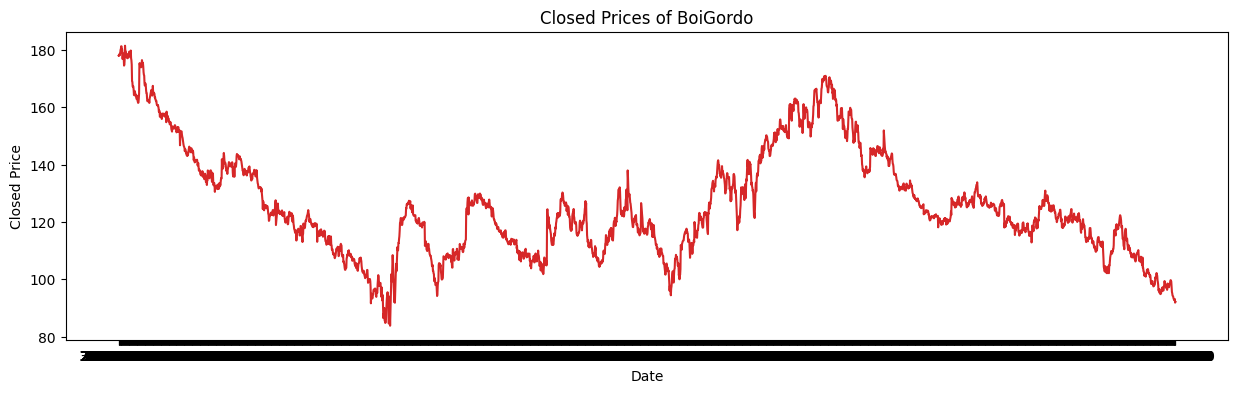

In [5]:
plot_df(df, x=df.index, y=df['LAST'], title='Closed Prices of BoiGordo', xlabel='Date', ylabel='Closed Price')

In [ ]:
multiplicative_decomposition = seasonal_decompose(df['LAST'], model='multiplicative', period=30)
additive_decomposition = seasonal_decompose(df['LAST'], model='additive', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

KeyError: 'Closed Prices'